In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

In [22]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [23]:
data.describe()

,category
count,6252.000000
mean,2.657550
std,1.528998
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2

In [24]:
sum(data['category']==1)

2120

In [142]:
data_x = data['image']
labels = data['category'].replace({1:1,2:0,3:0,4:0,5:0})

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
def pre_process(data): 
    data = data
    #x = np.array(data['image'])
    #la = np.array(data['category'])
    new = []
    for i in data:
        y = cv2.imread(i , 1)
        res = cv2.resize(y , (8,15))
        new.append(res)
    new = np.array(new)
    print(data.info())
    print(data.describe())
    return new

In [145]:
data_x = pre_process(data_x)

<class 'pandas.core.series.Series'>
RangeIndex: 6252 entries, 0 to 6251
Series name: image
Non-Null Count  Dtype 
--------------  ----- 
6252 non-null   object
dtypes: object(1)
memory usage: 49.0+ KB
None
count            6252
unique           6252
top       2823080.jpg
freq                1
Name: image, dtype: object


In [160]:
test_data = pd.read_csv('test.csv')
x = test_data['image']
test = []
for i in x:
    y = cv2.imread(i , 1)
    res = cv2.resize(y , (8,15))
    test.append(res)
test = np.array(test)
test_unrolled_array = test.reshape(8*15*3,2680 )
test_x = test_unrolled_array/255.


In [161]:
test_x.shape

(360, 2680)

In [101]:
#train_X,test_X,train_Y,test_Y = train_test_split(data_x,labels,test_size=0.10)

In [146]:
# splitting the traindata into training and validation data
train_X,valid_X,train_Y,valid_Y = train_test_split(data_x,labels,test_size=0.20)

In [147]:
train_X.shape

(5001, 15, 8, 3)

In [148]:
Unrolled_array = train_X.reshape(15*8*3,train_X.shape[0])
Normed_array = Unrolled_array/255.

In [149]:
train_y = train_Y.values.reshape((1,train_Y.shape[0]))

In [151]:
def initialize_with_zeros(dim):
    #w = np.zeros((dim,1))
    w = np.random.randn(dim, 1) * 0.01
    b = 0
    
    return w, b

In [152]:
# Helper function
def helper_sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [153]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    epsilon = 1e-5    
    m = X.shape[1]
    
    for i in range(num_iterations):
        A = helper_sigmoid(np.dot(w.T,X)+b)                                    
        Dw = (1/m)*(np.dot(X,(A-Y).T))
        Db = (1/m)*np.sum(A-Y)
        grads, cost = [{"Dw": Dw,
             "Db": Db},(-1/Y.shape[1]) * np.sum(Y*np.log(A+epsilon) + (1-Y)*np.log(1-A+epsilon))]


        
        
        # Retrieve derivatives from grads
        Dw = grads["Dw"]
        Db = grads["Db"]
        
        # update rule 
        w = w - learning_rate*Dw
        b = b - learning_rate*Db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"Dw": Dw,
             "Db": Db}
    
    return params, grads, costs

In [154]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = helper_sigmoid(np.dot(w.T,X)+b)                                    
        
    for i in range(A.shape[1]):  
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if(A[0,i]>0.5):
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    
    return Y_prediction

In [155]:
def model(X_train, Y_train, num_iterations = 2000, learning_rate = 0.5, print_cost = True):
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    #Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    #print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
        # "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [157]:
train_d = model(Normed_array , train_y , num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 66.52669466106778 %


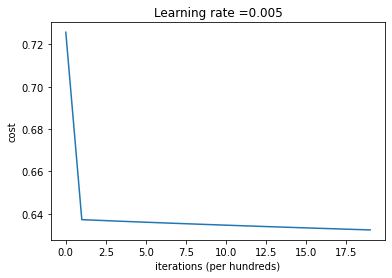

In [158]:
costs = np.squeeze(train_d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =0.005")
plt.show()

In [62]:
valid_d = model(valid_x , valid_y , num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 37.80975219824141 %


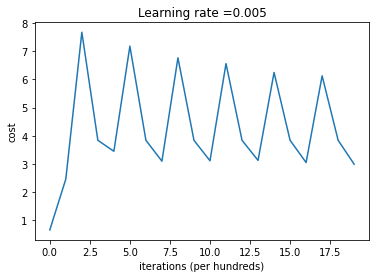

In [63]:
costs = np.squeeze(valid_d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =0.005")
plt.show()

In [4]:
# RELU UNIT
def layer_sizes(X, Y):

    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer

    return (n_x, n_h, n_y)

In [5]:
# RELU UNIT
def shallow_initialize_parameters(n_x, n_h, n_y): 
    np.random.seed(2) # we set up a seed so that your output matches my values

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))


    parameters = {"W1": W1,
    "b1": b1,
    "W2": W2,
    "b2": b2}

    return parameters

In [6]:
def shallow_forward_propagation(X, parameters):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]


    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1, X) + b1
    A1 = np.maximum(0, Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = helper_sigmoid(Z2)


    cache = {"Z1": Z1,
    "A1": A1,
    "Z2": Z2,
    "A2": A2}

    return A2, cache

In [8]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1] # number of example
    # Compute the cost
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),(1-Y))
    cost = -1/m * np.sum(logprobs)

    cost = float(np.squeeze(cost)) # makes sure cost is the dimension we expe
    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))

    return cost

In [9]:
def shallow_backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]

    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]

    # Backward propagation: calculate dW1, db1, dW2, db2, corresponding to 6 e
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (A1 > 0)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
    "db1": db1,
    "dW2": dW2,
    "db2": db2}

    return grads

In [10]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1,
    "b1": b1,
    "W2": W2,
    "b2": b2}

    return parameters

In [64]:
def nn_model(X, Y, n_h, num_iterations = 1000, print_cost=True):
 
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    costs = []
    # Initialize parameters
    parameters = shallow_initialize_parameters(n_x, n_h, n_y)
    

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2,cache = shallow_forward_propagation(X, parameters)
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads"
        grads = shallow_backward_propagation(parameters, cache, X, Y)
        # Gradient descent parameter update. Inputs: "parameters, grads". Outp
        parameters = update_parameters(parameters, grads)

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
    return parameters,costs

In [65]:
params,shallow_train_costs = nn_model(Normed_array,train_y,4)

Cost after iteration 0: 0.693353
Cost after iteration 100: 0.641388
Cost after iteration 200: 0.641388
Cost after iteration 300: 0.641388
Cost after iteration 400: 0.641388
Cost after iteration 500: 0.641388
Cost after iteration 600: 0.641388
Cost after iteration 700: 0.641388
Cost after iteration 800: 0.641388
Cost after iteration 900: 0.641388


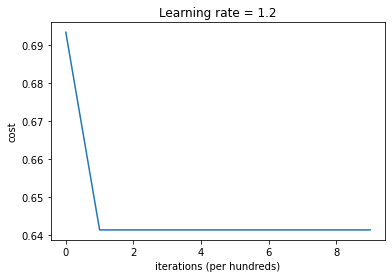

In [66]:
costs = np.squeeze(shallow_train_costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = 1.2")
plt.show()

In [68]:
valid_params,shallow_valid_costs = nn_model(valid_x,valid_y,4)

Cost after iteration 0: 0.693238
Cost after iteration 100: 0.636514
Cost after iteration 200: 0.636514
Cost after iteration 300: 0.636514
Cost after iteration 400: 0.636514
Cost after iteration 500: 0.636514
Cost after iteration 600: 0.636514
Cost after iteration 700: 0.636514
Cost after iteration 800: 0.636514
Cost after iteration 900: 0.636514


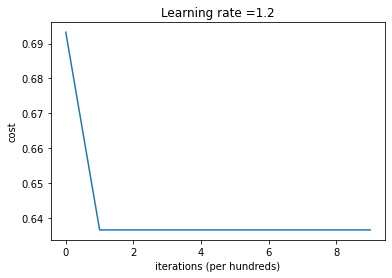

In [70]:
costs = np.squeeze(shallow_valid_costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =1.2")
plt.show()

In [30]:
def shallow_predict(parameters, X,Y):
    A2, cache = shallow_forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    print("accuracy: {} %".format(100 - np.mean(np.abs(predictions - Y)) * 100))
    return predictions

In [31]:
train_predictions = shallow_predict(params,Normed_array,train_y)

accuracy: 66.7866426714657 %


In [34]:
valid_predictions = shallow_predict(valid_params,valid_x,valid_y)

accuracy: 63.30935251798561 %


In [75]:
def initialize_parameters_deep(layer_dims):

    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))


    return parameters

In [76]:
def linear_forward(A, W, b):
 
    Z = np.dot(W, A) + b

    cache = (A, W, b)

    return Z, cache

In [77]:
sigmoid

<function dnn_utils_v2.sigmoid(Z)>

In [78]:
def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
    # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    elif activation == "relu":
    # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    cache = (linear_cache, activation_cache)
    return A, cache

In [79]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2 # number of layers in the neural network

    # Implement [LINEAR -> RELU]*(L-1). 
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W'+str(l)], parameters['b'+str(l)], activation='relu')
        caches.append(cache) # Add "cache" to the "caches" list

    # Implement LINEAR -> SIGMOID. 
    AL, cache = linear_activation_forward(A, parameters['W'+str(L)], parameters['b'+str(L)], activation='sigmoid')
    caches.append(cache) # Add "cache" to the "caches" list


    return AL, caches

In [80]:
def deep_compute_cost(AL, Y):
 
    m = Y.shape[1]
    # Compute loss from aL and y.
    cost = (-1/m) * np.sum(Y * np.log(AL) + (1-Y) * np.log(1-AL))

    cost = np.squeeze(cost) # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17

    return cost

In [81]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dA_prev = np.dot(W.T, dZ)
    dW = 1/m * np.dot(dZ, A_prev.T)
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)

    return dA_prev, dW, db

In [82]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db

In [83]:
def L_model_backward(AL, Y, caches):
 
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache,"sigmoid")

    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
    # lth layer: (RELU -> LINEAR) gradients.
    # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] =dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

In [84]:
def deep_update_parameters(parameters, grads, learning_rate):
 
    L = len(parameters) // 2 # number of layers in the neural network
    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    return parameters

In [85]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3,print_cost=True):
    np.random.seed(1)
    costs = [] # keep track of cost

    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):
    # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)

    # Compute cost.
        cost = deep_compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        # Update parameters.
        parameters = deep_update_parameters(parameters, grads, learning_rate)

        # Print the cost every 1 training example
        if print_cost and i % 1 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 1 == 0:
            costs.append(cost)

            # plot the cost
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per hundreds)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()

    return parameters,costs

In [86]:
def deep_predict(parameters, X,Y):
    A2, cache = L_model_forward(X, parameters)
    predictions = (A2 > 0.5)
    print("accuracy: {} %".format(100 - np.mean(np.abs(predictions - Y)) * 100))
    return predictions

In [87]:
Normed_array.shape

(79380, 5001)

In [88]:
layers_dims_train = [79380,5001,7,4,1]

Cost after iteration 0: 0.693138


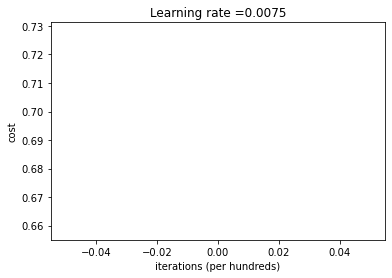

Cost after iteration 1: 0.692947


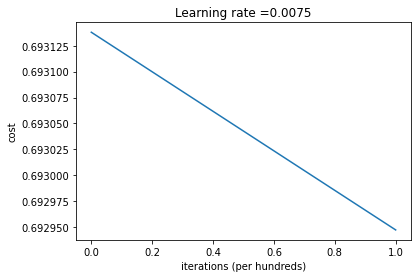

Cost after iteration 2: 0.692757


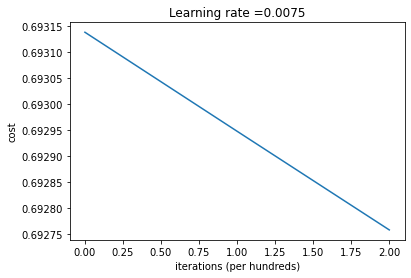

In [89]:
p,train_deep_costs = L_layer_model(Normed_array,train_y,layers_dims_train)

In [37]:
deep_trainpreds = deep_predict(p,Normed_array,train_y)

train accuracy: 66.26674665066986 %


array([[False, False, False, ..., False, False, False]])

In [91]:
layers_dims_valid = [79380,valid_x.shape[1],7,4,1]

Cost after iteration 0: 0.693148


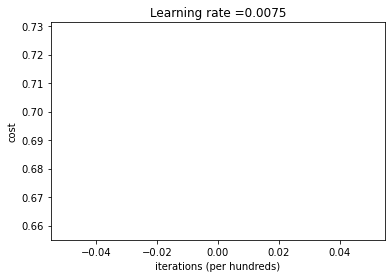

Cost after iteration 1: 0.692940


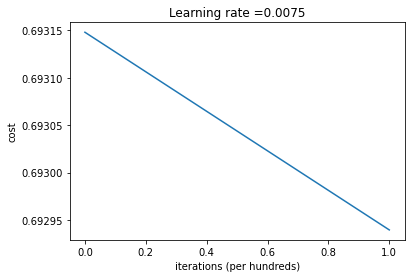

Cost after iteration 2: 0.692732


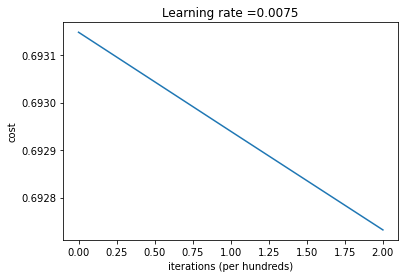

In [92]:
valid_p,valid_deep_costs = L_layer_model(valid_x,valid_y,layers_dims_valid)

In [61]:
deep_validpreds = deep_predict(p,valid_x,valid_y)

accuracy: 65.38768984812151 %
